# Práctica 3

## Problema 1:
Estamos esperando un tren que llegará en los próximos 100 minutos pero desconocemos
el momento exacto. Definimos la variable aleatoria X = "tiempo de espera en minutos".

a) Considera que X es una variable aleatoria uniforme en el intervalo [0, 100]. ¿Cuánto vale
E(X) y Var(X)?

In [1]:
# a) X sigue una distribución uniforme
# Utilizamos las expresiones teóricas para E(X) y Var(X)
E_teo = (100+0)/2
Var_teo = (100 + 0)^2/12

cat("Valor esperado:", E_teo)
cat("\n")
cat("Varianza:", Var_teo)

Valor esperado: 50
Varianza: 833.3333

b) Simula los tiempos de espera de una muestra aleatoria de personas con tamaño muestral
n = 30 y calcula la media muestral, $\bar{X}$ y la varianza muestral $S^2$.

In [2]:
#b) Muestra aleatoria uniforme 
n = 30
cat("Media muestral:", mean(runif(n, 0, 100)))
cat("\n")
cat("Varianza muestral:",var(runif(n, 0, 100)))

Media muestral: 57.54056
Varianza muestral: 996.0693

Observamos que los valores de $\bar{X}$ y $S^2$ diferen considerablemente de los valores teóricos obtenidos para el valor esperado y la varianza. Esto se debe a que el tamaño muestral ($n=30$) es demasiado pequeño.

c) ¿Cuanto valen E($\bar{X}$) y Var($\bar{X}$) para n = 30? Y si aumentaramos a n = 100?

In [3]:
#c) Fórmulas E(\bar{X}), Var(\bar{X}) (p.36 de los apuntes)
E_muest = E_teo
Var30 = Var_teo/30
Var100 = Var_teo/100

cat("Valor esperado de la media muestral para n = 30:", E_muest)
cat("\n")
cat("Valor esperado de la media muestral para n = 100:", E_muest)
cat("\n")
cat("Valor esperado de la varianza muestral para n = 30:", Var30)
cat("\n")
cat("Valor esperado de la varianza muestral para n = 100:", Var100)

Valor esperado de la media muestral para n = 30: 50
Valor esperado de la media muestral para n = 100: 50
Valor esperado de la varianza muestral para n = 30: 27.77778
Valor esperado de la varianza muestral para n = 100: 8.333333

Observamos como, por definición, $E(\bar{X}) = E(X) = 50$, para cualquier tamaño de n.

Por otro lado, cuanto mayor sea el tamaño de la muestra, menor será la varianza muestral, ya que $Var(\bar{X}) = \frac{Var(X)}{n}$.


d) Simula 500 muestras aleatorias de tama~no n = 30 de la variable X. Recomendación: Introduce las muestras en una matriz de 30 filas y 500 columnas.

e) Calcula las 500 medias muestrales, es decir $\bar{X}_1$, ...$\bar{X}_500$. Recomendación: Utiliza el
comando colMeans .

f) Calcula la media y varianza de las 500 medias muestrales y comparalas con los valores
obtenidos en el tercer apartado.

In [4]:
#d) Simulamos 500 muestras de tamaño 30
m30 = matrix(data = NA, nrow = 30, ncol = 500)
for(i in c(1:500)){
  m30[,i] = runif(30, 0, 100)
}
# e) Calculamos las medias muestrales de las 500 muestras
meanbycol30 = colMeans(m30)
# f) Calculamos media y varianza de las medias muestrales
E30 = mean(meanbycol30)
V30 = var(meanbycol30)

cat("Valor esperado de la media muestral para n = 30:", E30)
cat("\n")
cat("Valor esperado de la varianza muestral para n = 30:",V30)

Valor esperado de la media muestral para n = 30: 49.8858
Valor esperado de la varianza muestral para n = 30: 24.46326

En esencia, lo que se realiza en esta celda es la aplicación del Teorema Central del Límite (TCL), obteniendo unos valores de media muestral y varianza muestral muy similares a los valores esperados del apartado anterior, ya que ahora disponemos de un número mayor de muestras con las que realizar cálculos estadísticos.

g) Repite los tres pasos anteriores para 500 muestras aleatorias de tamaño n = 100.

In [5]:
# g) Repetimos para tamaño n = 100
m100 = matrix(data = NA, nrow = 100, ncol = 500)
for(i in c(1:500)){
  m100[,i] = runif(100, 0, 100)
}
meanbycol100 = colMeans(m100)
E100 = mean(meanbycol100)
V100 = var(meanbycol100)

cat("Valor esperado de la media muestral para n = 100:", E100)
cat("\n")
cat("Valor esperado de la varianza muestral para n = 100:",V100)

Valor esperado de la media muestral para n = 100: 50.02892
Valor esperado de la varianza muestral para n = 100: 8.958722

Nuevamente, los valores obtenidos para la media muestral y varianza muestral son muy similares a los del apartado c). Como se ha mencionado antes, la varianza se reduce al estar trabajando con muestras te tamaño $n=100$.

h) Representa las 500 medias de tamaño n = 30 y las 500 medias de tamaño n = 100 mediante
dos histogramas en una gráfica de dos paneles. 

i) Superpón a cada histograma la función densidad normal con $\mu$ = E(X) y $\sigma^2$ = Var(X)=n.

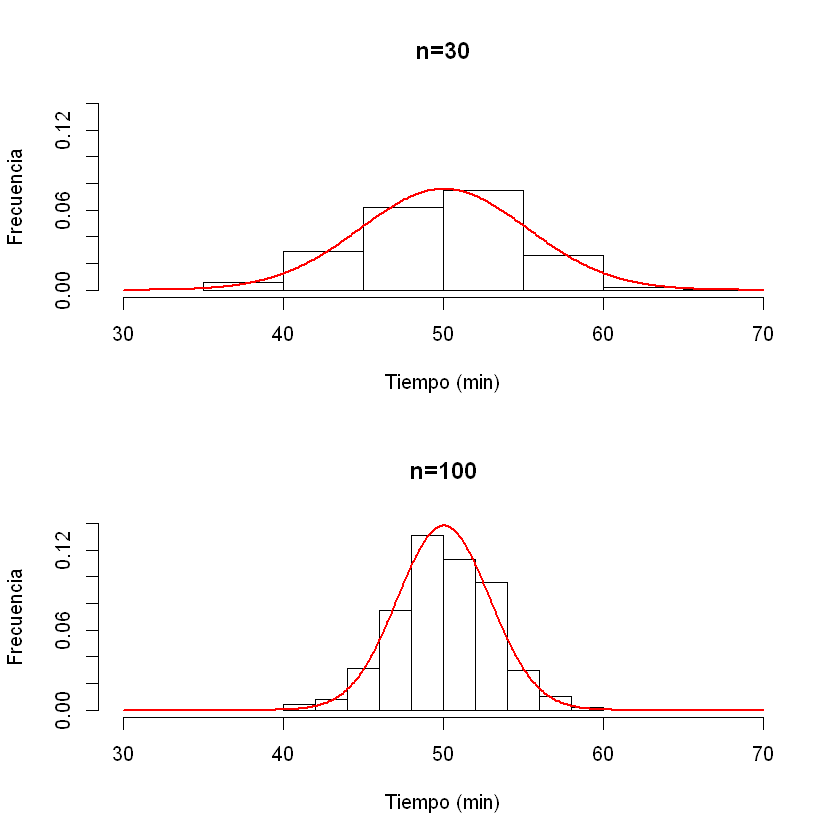

In [6]:
# h)
par(mfrow = c(2,1))

min = 30
max = 70

x30 = seq(min, max, by = .1)
y30 = dnorm(x30, mean = E_teo, sd = sqrt(Var_teo/30))
x100 = x30
y100 = dnorm(x100, mean = E_teo, sd = sqrt(Var_teo/100))

ymax = max(y100)

hist(meanbycol30,
     freq = F,
     xlim = c(min, max),
     ylim = c(0,ymax),
     xlab = "Tiempo (min)", 
     ylab = "Frecuencia",
     main = "n=30")

lines(x30, y30, col = "red", lwd = 2)

hist(meanbycol100,
     freq = F,
     xlim = c(min, max),
     ylim = c(0,ymax),
     xlab = "Tiempo (min)", 
     ylab = "Frecuencia",
     main = "n=100")

lines(x100, y100, col = "red", lwd = 2)

j) Comenta el resultado.

Estamos ante un claro ejemplo de cómo funciona el TLC. Para un tamaño muestral pequeño, $n=30$, la distribución de la variable X apenas se asemeja a una normal. Sin embargo, al aumentar el tamaño muestral a $n=100$, la distribución se ajusta mejor, tal y como predice el TLC. De hecho, de seguir aumentando el tamaño muestral, por ejemplo $n=1000$, la semejanza con la distribución normal será más que apreciable.